In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from ast import literal_eval
import time
import requests

In [113]:
# Import the dataset
data = pd.read_csv('http://fantasyoverlord.com/FPL/DataWithForecasts',encoding='iso8859_2')
data.index = range(1, data.shape[0] + 1)
data.head(10)

,FirstName,Surname,PositionsList,Team,Cost,PointsLastRound,TotalPoints,AveragePoints,AveragePointsPerDollar,TotalPointsPerDollar,...,GW29Forecast,GW30Forecast,GW31Forecast,GW32Forecast,GW33Forecast,GW34Forecast,GW35Forecast,GW36Forecast,GW37Forecast,GW38Forecast
1,NaN,A.Armstrong,FWD,SOU,5500000,4,5,2.5,4.545455e-07,9.090909e-07,...,1.9,1.2,3.5,1.2,1.5,1.2,1.2,1.4,1.2,3.5
2,NaN,A.Doucoure,MID,EVE,5500000,1,3,1.5,2.727273e-07,5.454545e-07,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
3,Brenden,Aaronson,MID,LEE,5500000,1,3,1.5,2.727273e-07,5.454545e-07,...,0.8,1.1,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
4,NaN,Adama,MID,WOL,5500000,1,1,1.0,1.818182e-07,1.818182e-07,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
5,Che,Adams,FWD,SOU,6400000,2,2,2.0,3.125000e-07,3.125000e-07,...,1.3,1.0,2.8,1.0,1.0,1.0,1.0,1.0,1.0,2.8
6,Tyler,Adams,MID,LEE,5000000,2,3,1.5,3.000000e-07,6.000000e-07,...,0.8,1.1,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
7,NaN,Adrian,GLK,LIV,4000000,0,0,0.0,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Nayef,Aguerd,DEF,WHU,4900000,0,0,0.0,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Rayan,Ait-Nouri,DEF,WOL,4500000,6,5,2.5,5.555556e-07,1.111111e-06,...,1.2,2.8,1.2,1.2,3.5,1.5,1.2,2.9,3.5,1.2
10,Kristoffer,Ajer,DEF,BRE,4500000,0,0,0.0,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
#Top players untile this GW [Total]
data.sort_values(by=['TotalPoints'],ascending=False)[data.columns[:(data.columns.get_indexer(['NextFixture5'])+2)[0]]].head(50)

,FirstName,Surname,PositionsList,Team,Cost,PointsLastRound,TotalPoints,AveragePoints,AveragePointsPerDollar,TotalPointsPerDollar,...,TransfersInRound,PriceRiseRound,RedCards,BPS,NextFixture1,NextFixture2,NextFixture3,NextFixture4,NextFixture5,GW2Forecast
448,NaN,Rodrigo,MID,LEE,6100000,15,22,22.0,3.606557e-06,3.606557e-06,...,382402,1,0,72,Southampton,Chelsea,Brighton,Everton,Brentford F.C.,13.9776
256,NaN,Jesus,FWD,ARS,8000000,19,21,10.5,1.312500e-06,2.625000e-06,...,263271,0,0,72,Leicester,Bournemouth,Fulham,Aston Villa,Man Utd,14.9000
135,Kevin,De Bruyne,MID,MCI,12000000,14,20,10.0,8.333333e-07,1.666667e-06,...,136609,0,0,70,Bournemouth,Newcastle,Crystal Palace,Nottingham Forest FC,Aston Villa,12.2000
476,Fabian,Schar,DEF,NEW,4600000,5,20,10.0,2.173913e-06,4.347826e-06,...,99149,0,0,65,Brighton,Man City,Wolverhampton,Liverpool,Crystal Palace,12.4000
216,Pascal,Gro?,MID,BHA,5600000,3,18,9.0,1.607143e-06,3.214286e-06,...,91420,0,0,51,Newcastle,West Ham,Leeds United F.C.,Fulham,Leicester,9.9000
223,Erling,Haaland,FWD,MCI,11700000,5,18,9.0,7.692308e-07,1.538462e-06,...,93981,1,0,64,Bournemouth,Newcastle,Crystal Palace,Nottingham Forest FC,Aston Villa,11.0000
87,Joao,Cancelo,DEF,MCI,7000000,11,18,9.0,1.285714e-06,2.571429e-06,...,97467,0,0,63,Bournemouth,Newcastle,Crystal Palace,Nottingham Forest FC,Aston Villa,12.4000
458,NaN,Sa,GLK,WOL,5000000,15,17,8.5,1.700000e-06,3.400000e-06,...,21610,0,0,60,Fulham,Tottenham,Newcastle,Bournemouth,Southampton,10.5000
230,Dean,Henderson,GLK,NFO,4500000,14,17,8.5,1.888889e-06,3.777778e-06,...,42321,0,0,69,West Ham,Everton,Tottenham,Man City,Bournemouth,12.1000
530,Ivan,Toney,FWD,BRE,7000000,9,17,8.5,1.214286e-06,2.428571e-06,...,110356,0,0,57,Man Utd,Fulham,Everton,Crystal Palace,Leeds United F.C.,12.1000


In [115]:
#Top palyer in the last GW
data.sort_values(by=['PointsLastRound'],ascending=False)[data.columns[:(data.columns.get_indexer(['NextFixture5'])+2)[0]]].head(50)

,FirstName,Surname,PositionsList,Team,Cost,PointsLastRound,TotalPoints,AveragePoints,AveragePointsPerDollar,TotalPointsPerDollar,...,TransfersInRound,PriceRiseRound,RedCards,BPS,NextFixture1,NextFixture2,NextFixture3,NextFixture4,NextFixture5,GW2Forecast
256,NaN,Jesus,FWD,ARS,8000000,19,21,10.5,1.312500e-06,2.625000e-06,...,263271,0,0,72,Leicester,Bournemouth,Fulham,Aston Villa,Man Utd,14.9000
448,NaN,Rodrigo,MID,LEE,6100000,15,22,22.0,3.606557e-06,3.606557e-06,...,382402,1,0,72,Southampton,Chelsea,Brighton,Everton,Brentford F.C.,13.9776
458,NaN,Sa,GLK,WOL,5000000,15,17,8.5,1.700000e-06,3.400000e-06,...,21610,0,0,60,Fulham,Tottenham,Newcastle,Bournemouth,Southampton,10.5000
349,Ben,Mee,DEF,BRE,4500000,14,14,7.0,1.555556e-06,3.111111e-06,...,77912,0,0,41,Man Utd,Fulham,Everton,Crystal Palace,Leeds United F.C.,9.9000
135,Kevin,De Bruyne,MID,MCI,12000000,14,20,10.0,8.333333e-07,1.666667e-06,...,136609,0,0,70,Bournemouth,Newcastle,Crystal Palace,Nottingham Forest FC,Aston Villa,12.2000
255,Mathias,Jensen,MID,BRE,5000000,14,15,7.5,1.500000e-06,3.000000e-06,...,70987,0,0,48,Man Utd,Fulham,Everton,Crystal Palace,Leeds United F.C.,9.5000
230,Dean,Henderson,GLK,NFO,4500000,14,17,8.5,1.888889e-06,3.777778e-06,...,42321,0,0,69,West Ham,Everton,Tottenham,Man City,Bournemouth,12.1000
576,Granit,Xhaka,MID,ARS,5000000,12,14,7.0,1.400000e-06,2.800000e-06,...,51066,0,0,47,Leicester,Bournemouth,Fulham,Aston Villa,Man Utd,7.1000
87,Joao,Cancelo,DEF,MCI,7000000,11,18,9.0,1.285714e-06,2.571429e-06,...,97467,0,0,63,Bournemouth,Newcastle,Crystal Palace,Nottingham Forest FC,Aston Villa,12.4000
561,Ollie,Watkins,FWD,AVL,7400000,11,12,6.0,8.108108e-07,1.621622e-06,...,22377,0,0,30,Everton,Crystal Palace,West Ham,Arsenal,Man City,7.9000


In [116]:
data[data.PositionsList == 'GLK'].sort_values(by=[data.columns[(data.columns.get_indexer(['NextFixture5'])+1)][0]],ascending=False,ignore_index=True)[['FirstName','Surname',data.columns[(data.columns.get_indexer(['NextFixture5'])+1)[0]]]].head(20)

,FirstName,Surname,GW2Forecast
0,Dean,Henderson,12.1
1,NaN,Sa,10.5
2,Nick,Pope,9.1
3,NaN,Ederson,8.0
4,NaN,Raya,6.4
5,Robert,Sanchez,5.5
6,Marek,Rodak,4.3
7,Edouard,Mendy,3.8
8,Aaron,Ramsdale,2.8
9,NaN,Martinez,2.8


In [117]:
cols = ['FirstName', 'Surname', 'PositionsList', 'Team', 'Cost','PointsLastRound']

In [118]:
cols

['FirstName', 'Surname', 'PositionsList', 'Team', 'Cost', 'PointsLastRound']

In [119]:
#How much a player’s price has increased since the start of the season
cols.append('PriceRise')
data.sort_values(by=['PriceRise'],ascending=False,ignore_index=True)[cols].head(50)
cols.remove('PriceRise')

In [120]:
# How much a player’s price has increased this Gameweek.
cols.append('PriceRiseRound')
data.sort_values(by=['PriceRiseRound'],ascending=False,ignore_index=True)[cols].head(50)
cols.remove('PriceRiseRound')

In [121]:
#How much a player’s price has decreased since the start of the season
cols.append('PriceFall')
data.sort_values(by=['PriceFall'],ascending=False,ignore_index=True)[cols].head(50)
cols.remove('PriceFall')

In [122]:
# How much a player’s price has decreased this Gameweek.
cols.append('PriceFallRound')
data.sort_values(by=['PriceFallRound'],ascending=False,ignore_index=True)[cols].head(50)
cols.remove('PriceFallRound')

In [123]:
#Top Transfers Out this round
cols.append('TransfersOutRound')
data.sort_values(by=['TransfersOutRound'],ascending=False,ignore_index=True)[cols].head(50)
cols.remove('TransfersOutRound')

In [124]:
#Top Transfers In this round
cols.append('TransfersInRound')
data.sort_values(by=['TransfersInRound'],ascending=False,ignore_index=True)[cols].head(50)
cols.remove('TransfersInRound')

In [125]:
data.columns

Index(['FirstName', 'Surname', 'PositionsList', 'Team', 'Cost',
       'PointsLastRound', 'TotalPoints', 'AveragePoints',
       'AveragePointsPerDollar', 'TotalPointsPerDollar', 'GameweekWeighting',
       'TransfersOut', 'YellowCards', 'GoalsConceded', 'GoalsConcededPoints',
       'Saves', 'SavesPoints', 'GoalsScored', 'GoalsScoredPoints',
       'ValueSeason', 'TransfersOutRound', 'PriceRise', 'PriceFallRound',
       'LastSeasonPoints', 'PriceFall', 'ValueForm', 'PenaltiesMissed', 'Form',
       'Bonus', 'FanRating', 'CleanSheets', 'CleanSheetPoints', 'Assists',
       'SelectedByPercent', 'TransfersIn', 'OwnGoals', 'EAIndex',
       'PenaltiesSaved', 'DreamteamCount', 'MinutesPlayed', 'TransfersInRound',
       'PriceRiseRound', 'RedCards', 'BPS', 'NextFixture1', 'NextFixture2',
       'NextFixture3', 'NextFixture4', 'NextFixture5', 'GW2Forecast',
       'GW3Forecast', 'GW4Forecast', 'GW5Forecast', 'GW6Forecast',
       'GW7Forecast', 'GW8Forecast', 'GW9Forecast', 'GW10Forecast',

In [126]:
#Top selected Plyers
data.sort_values(by=['SelectedByPercent'],ascending=False,ignore_index=True)[data.columns[:(data.columns.get_indexer(['NextFixture5'])+2)[0]]].head(50)
#data.index = range(1, data.shape[0] + 1)

,FirstName,Surname,PositionsList,Team,Cost,PointsLastRound,TotalPoints,AveragePoints,AveragePointsPerDollar,TotalPointsPerDollar,...,TransfersInRound,PriceRiseRound,RedCards,BPS,NextFixture1,NextFixture2,NextFixture3,NextFixture4,NextFixture5,GW2Forecast
0,NaN,Jesus,FWD,ARS,8000000,19,21,10.5,1.312500e-06,2.625000e-06,...,263271,0,0,72,Leicester,Bournemouth,Fulham,Aston Villa,Man Utd,14.90
1,Mohamed,Salah,MID,LIV,13000000,0,12,12.0,9.230769e-07,9.230769e-07,...,46341,0,0,34,Crystal Palace,Man Utd,Bournemouth,Newcastle,Everton,13.60
2,Erling,Haaland,FWD,MCI,11700000,5,18,9.0,7.692308e-07,1.538462e-06,...,93981,1,0,64,Bournemouth,Newcastle,Crystal Palace,Nottingham Forest FC,Aston Villa,11.00
3,Trent,Alexander-Arnold,DEF,LIV,7500000,0,1,1.0,1.333333e-07,1.333333e-07,...,23460,0,0,13,Crystal Palace,Man Utd,Bournemouth,Newcastle,Everton,1.10
4,Joao,Cancelo,DEF,MCI,7000000,11,18,9.0,1.285714e-06,2.571429e-06,...,97467,0,0,63,Bournemouth,Newcastle,Crystal Palace,Nottingham Forest FC,Aston Villa,12.40
5,Reece,James,DEF,CHE,6000000,7,14,7.0,1.166667e-06,2.333333e-06,...,111677,0,0,62,Tottenham,Leeds United F.C.,Leicester,Southampton,West Ham,8.50
6,NaN,Martinelli,MID,ARS,6200000,8,16,8.0,1.290323e-06,2.580645e-06,...,492892,1,0,53,Leicester,Bournemouth,Fulham,Aston Villa,Man Utd,8.70
7,NaN,N.Williams,DEF,NFO,4000000,7,7,3.5,8.750000e-07,1.750000e-06,...,78928,0,0,34,West Ham,Everton,Tottenham,Man City,Bournemouth,4.40
8,Danny,Ward,GLK,LEI,4000000,1,2,1.0,2.500000e-07,5.000000e-07,...,59860,0,0,23,Arsenal,Southampton,Chelsea,Man Utd,Brighton,0.50
9,Oleksandr,Zinchenko,DEF,ARS,5100000,1,13,6.5,1.274510e-06,2.549020e-06,...,134457,0,0,53,Leicester,Bournemouth,Fulham,Aston Villa,Man Utd,7.20


In [127]:
# Forcasting
data.sort_values(by=[data.columns[(data.columns.get_indexer(['NextFixture5'])+1)][0]],ascending=False,ignore_index=True)[data.columns[:(data.columns.get_indexer(['NextFixture5'])+2)[0]]].head(50)

,FirstName,Surname,PositionsList,Team,Cost,PointsLastRound,TotalPoints,AveragePoints,AveragePointsPerDollar,TotalPointsPerDollar,...,TransfersInRound,PriceRiseRound,RedCards,BPS,NextFixture1,NextFixture2,NextFixture3,NextFixture4,NextFixture5,GW2Forecast
0,NaN,Jesus,FWD,ARS,8000000,19,21,10.5,1.312500e-06,2.625000e-06,...,263271,0,0,72,Leicester,Bournemouth,Fulham,Aston Villa,Man Utd,14.9000
1,NaN,Rodrigo,MID,LEE,6100000,15,22,22.0,3.606557e-06,3.606557e-06,...,382402,1,0,72,Southampton,Chelsea,Brighton,Everton,Brentford F.C.,13.9776
2,Mohamed,Salah,MID,LIV,13000000,0,12,12.0,9.230769e-07,9.230769e-07,...,46341,0,0,34,Crystal Palace,Man Utd,Bournemouth,Newcastle,Everton,13.6000
3,NaN,Darwin,FWD,LIV,9100000,0,9,9.0,9.890110e-07,9.890110e-07,...,66481,0,0,31,Crystal Palace,Man Utd,Bournemouth,Newcastle,Everton,12.8000
4,Josh,Dasilva,MID,BRE,4600000,8,14,14.0,3.043478e-06,3.043478e-06,...,294968,1,0,48,Man Utd,Fulham,Everton,Crystal Palace,Leeds United F.C.,12.7360
5,Phil,Foden,MID,MCI,8000000,9,12,12.0,1.500000e-06,1.500000e-06,...,80560,0,0,49,Bournemouth,Newcastle,Crystal Palace,Nottingham Forest FC,Aston Villa,12.5600
6,Joao,Cancelo,DEF,MCI,7000000,11,18,9.0,1.285714e-06,2.571429e-06,...,97467,0,0,63,Bournemouth,Newcastle,Crystal Palace,Nottingham Forest FC,Aston Villa,12.4000
7,Fabian,Schar,DEF,NEW,4600000,5,20,10.0,2.173913e-06,4.347826e-06,...,99149,0,0,65,Brighton,Man City,Wolverhampton,Liverpool,Crystal Palace,12.4000
8,Kevin,De Bruyne,MID,MCI,12000000,14,20,10.0,8.333333e-07,1.666667e-06,...,136609,0,0,70,Bournemouth,Newcastle,Crystal Palace,Nottingham Forest FC,Aston Villa,12.2000
9,Ivan,Toney,FWD,BRE,7000000,9,17,8.5,1.214286e-06,2.428571e-06,...,110356,0,0,57,Man Utd,Fulham,Everton,Crystal Palace,Leeds United F.C.,12.1000


In [128]:
# Get data for selected players
data[data['Surname'].isin(['Salah','Haaland'])][data.columns[:(data.columns.get_indexer(['NextFixture5'])+2)[0]]].reset_index(drop=True)

,FirstName,Surname,PositionsList,Team,Cost,PointsLastRound,TotalPoints,AveragePoints,AveragePointsPerDollar,TotalPointsPerDollar,...,TransfersInRound,PriceRiseRound,RedCards,BPS,NextFixture1,NextFixture2,NextFixture3,NextFixture4,NextFixture5,GW2Forecast
0,Erling,Haaland,FWD,MCI,11700000,5,18,9.0,7.692308e-07,1.538462e-06,...,93981,1,0,64,Bournemouth,Newcastle,Crystal Palace,Nottingham Forest FC,Aston Villa,11.0
1,Mohamed,Salah,MID,LIV,13000000,0,12,12.0,9.230769e-07,9.230769e-07,...,46341,0,0,34,Crystal Palace,Man Utd,Bournemouth,Newcastle,Everton,13.6


In [129]:
data[data.PositionsList == 'GLK'].sort_values(by=[data.columns[(data.columns.get_indexer(['NextFixture5'])+1)][0]],ascending=False,ignore_index=True)[['FirstName','Surname',data.columns[(data.columns.get_indexer(['NextFixture5'])+1)[0]]]].head(20)

,FirstName,Surname,GW2Forecast
0,Dean,Henderson,12.1
1,NaN,Sa,10.5
2,Nick,Pope,9.1
3,NaN,Ederson,8.0
4,NaN,Raya,6.4
5,Robert,Sanchez,5.5
6,Marek,Rodak,4.3
7,Edouard,Mendy,3.8
8,Aaron,Ramsdale,2.8
9,NaN,Martinez,2.8


# Read data from FPL API

In [130]:
# Import data from FPL API

url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
data_json = r.json()
print(data_json.keys())

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])


In [143]:
elements_df = pd.DataFrame(data_json['elements'])
elements_types_df = pd.DataFrame(data_json['element_types'])
teams_df = pd.DataFrame(data_json['teams'])

In [132]:
elements_df.head()
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [134]:
slim_elements_df = elements_df[['second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','event_points','total_points','dreamteam_count','form','transfers_in_event', 'transfers_out', 'transfers_out_event','value_form','goals_scored',
'assists', 'clean_sheets', 'goals_conceded', 'own_goals','penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards','saves', 'bonus', 'bps','ict_index']]
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)
slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
#slim_elements_df = slim_elements_df.loc[slim_elements_df.value >= 0]
slim_elements_df.head(10)

C:\Users\loain\AppData\Local\Temp\ipykernel_19160\1256876862.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)
C:\Users\loain\AppData\Local\Temp\ipykernel_19160\1256876862.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)
C:\Users\loain\AppData\Local\Temp\ipykernel_19160\1256876862.py:5: SettingWithCopyWarnin

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,event_points,total_points,...,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,ict_index,position,value
0,Alves Soares,Arsenal,2,0.3,44,0,1879,0.0,0,0,...,0,0,0,0,0,0,0,0.0,Defender,0.0
1,Xhaka,Arsenal,3,1.5,50,180,70763,2.8,12,14,...,0,0,1,0,0,2,47,14.2,Midfielder,2.8
2,Elneny,Arsenal,3,1.1,44,0,19423,0.0,0,0,...,0,0,0,0,0,0,0,0.0,Midfielder,0.0
3,Holding,Arsenal,2,0.2,44,0,1023,0.0,0,0,...,0,0,0,0,0,0,0,0.0,Defender,0.0
4,Partey,Arsenal,3,0.7,50,180,16716,1.0,2,5,...,0,0,0,0,0,0,26,9.5,Midfielder,1.0
5,Ødegaard,Arsenal,3,12.3,65,180,89829,0.8,2,5,...,0,0,0,0,0,0,28,7.0,Midfielder,0.8
6,Tierney,Arsenal,2,1.1,50,20,4959,0.4,1,2,...,0,0,0,0,0,0,6,0.7,Defender,0.4
7,Pépé,Arsenal,3,0.3,54,0,3252,0.0,0,0,...,0,0,0,0,0,0,0,0.0,Midfielder,0.0
8,White,Arsenal,2,6.1,45,164,47365,1.3,1,6,...,0,0,1,0,0,0,33,5.6,Defender,1.3
9,Nketiah,Arsenal,4,0.6,69,13,5049,0.3,1,2,...,0,0,0,0,0,0,5,3.3,Forward,0.3


In [135]:
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
mid_df.sort_values('transfers_in',ascending=False).head(20)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,event_points,total_points,...,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,ict_index,position,value
17,Martinelli Silva,Arsenal,3,33.4,62,180,1009870,2.6,8,16,...,0,0,0,0,0,1,53,20.1,Midfielder,2.6
519,Kulusevski,Spurs,3,13.5,81,175,569697,1.9,2,15,...,0,0,0,0,0,3,50,15.9,Midfielder,1.9
292,Moreno,Leeds,3,7.2,61,154,509864,3.6,15,22,...,0,0,0,0,0,3,72,28.5,Midfielder,3.6
89,Dasilva,Brentford,3,7.1,46,92,505229,3.0,8,14,...,0,0,0,0,0,0,48,9.3,Midfielder,3.0
117,Groß,Brighton,3,5.6,56,180,392223,3.2,3,18,...,0,0,0,0,0,3,51,24.1,Midfielder,3.2
354,De Bruyne,Man City,3,19.1,120,177,321799,1.7,14,20,...,0,0,0,0,0,3,70,27.9,Midfielder,1.7
329,Salah,Liverpool,3,62.5,130,180,233115,1.1,2,14,...,0,0,0,0,0,2,39,23.1,Midfielder,1.1
253,Hoelgebaum Pereira,Fulham,3,24.4,45,173,219524,1.1,3,5,...,0,0,0,0,0,0,11,6.4,Midfielder,1.1
478,Ward-Prowse,Southampton,3,10.9,65,180,214452,1.7,2,11,...,0,0,0,0,0,2,41,14.3,Midfielder,1.7
147,Frello Filho,Chelsea,3,4.7,60,162,193172,2.2,2,13,...,0,0,0,0,0,3,48,12.2,Midfielder,2.2


In [149]:
# Find the captin in the pick
user_id = '7869341'
pick_url = 'https://fantasy.premierleague.com/api/entry/'+user_id+'/event/2/picks/'
rr = requests.get(pick_url)
pick_json = rr.json()
pick_json.keys()
p_df = pd.DataFrame(pick_json['picks'])
p_df['element'] = p_df.element.map(elements_df.set_index('id').second_name)
print('The captain -> ',p_df['element'][p_df['is_captain'] == True])
p_df

The captain ->  10    Haaland
Name: element, dtype: object


,element,position,multiplier,is_captain,is_vice_captain
0,Ramses Becker,1,1,False,False
1,Alexander-Arnold,2,1,False,False
2,Zinchenko,3,1,False,False
3,Cancelo,4,1,False,False
4,James,5,1,False,False
5,Bailey,6,1,False,False
6,Foden,7,1,False,False
7,Salah,8,1,False,True
8,Martinelli Silva,9,1,False,False
9,Fernando de Jesus,10,1,False,False


# Build the Model

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error

X = slim_elements_df.drop(columns=['second_name','team','event_points','position'])
Y = slim_elements_df['event_points']
x_trn,x_ts,y_trn,y_ts = train_test_split(X,Y,test_size=0.20)

In [137]:
model = DecisionTreeRegressor(random_state=0)
model.fit(x_trn,y_trn)
y_pred = model.predict(x_ts)
print('MSE -> ',mean_squared_error(y_ts,y_pred))
print('MAE -> ',mean_absolute_error(y_ts,y_pred))

MSE ->  1.8034188034188035
MAE ->  0.5726495726495726


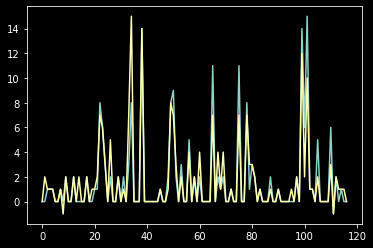

In [138]:
plt.plot(y_pred)
plt.plot(list(y_ts))